--- Arquivo Original (dataset_projecao_final) ---
    Ano  MGLU3_Cresc_AA  Margem_Bruta       ROE  Giro_Ativo  \
0  2011      -16.252091     33.403382  0.598873    0.368913   
1  2012      -65.430303     32.856858 -0.280447    0.367336   
2  2013      126.731252     31.235383  4.429431    1.269443   
3  2014        8.922955     27.532161  4.429686    0.517182   
4  2015       -5.578938     28.720813 -2.288484    0.452114   

   Liquidez_Corrente  PIB_Var_Real  Consumo_Familia_Var_Real  
0           1.146323           4.0                       4.8  
1           1.184715           1.9                       3.5  
2           1.193355           3.0                       3.5  
3           1.195992           0.5                       2.3  
4           1.317996          -3.5                      -3.2  
------------------------------------------

Variáveis preditivas (X):
['Margem_Bruta', 'ROE', 'Giro_Ativo', 'Liquidez_Corrente', 'PIB_Var_Real', 'Consumo_Familia_Var_Real']
Variável alvo (Y): M

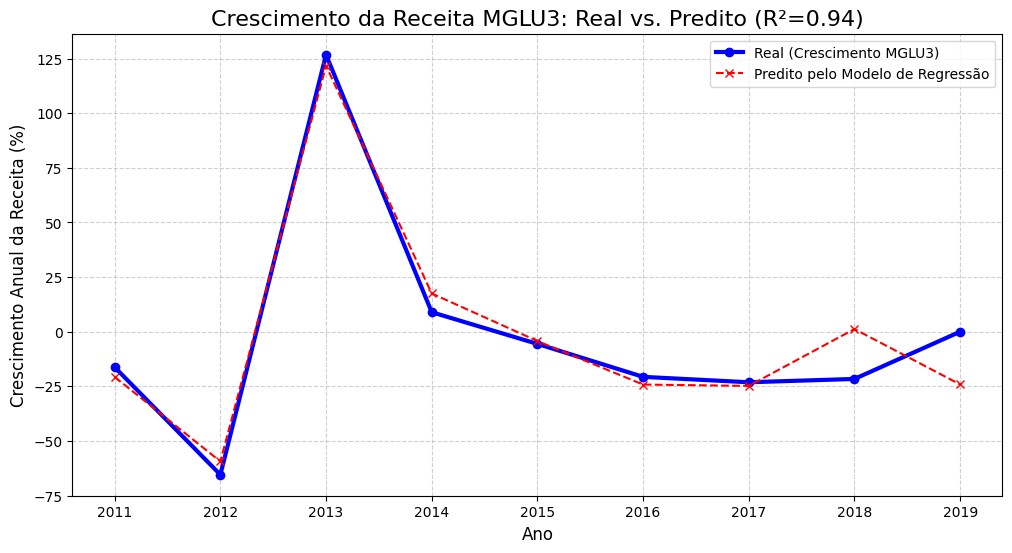

In [2]:
# CONFIGURAÇÃO E IMPORTAÇÃO DE BIBLIOTECAS (Continuação)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define o caminho base de onde o script está
# Usando Path.cwd() ou o caminho relativo
PASTA_DATA = Path('../Data')

# CAMINHO LOCAL
df_modelo_final = pd.read_csv( PASTA_DATA / 'mglu3_dataset_projecao_final.csv')
print("--- Arquivo Original (dataset_projecao_final) ---")
print(df_modelo_final.head())
print("------------------------------------------")

# VARIÁVEL ALVO
Y = df_modelo_final['MGLU3_Cresc_AA'] 


# VARIÁVEIS PREDITIVAS
X = df_modelo_final.drop(columns=['Ano', 'MGLU3_Cresc_AA']) 


X_train = X
Y_train = Y


print(f"\nVariáveis preditivas (X):\n{X.columns.tolist()}")
print(f"Variável alvo (Y): MGLU3_Cresc_AA")


modelo = LinearRegression()
modelo.fit(X_train, Y_train)
Y_pred = modelo.predict(X_train) 


# COEFICIENTE DE DETERMINAÇÃO
r2 = r2_score(Y_train, Y_pred)
# ERRO QUADRÁTICO MÉDIO
mse = mean_squared_error(Y_train, Y_pred)


print("\n=======================================================================")
print("📊 AVALIAÇÃO DO MODELO DE REGRESSÃO")
print("=======================================================================")
print(f"R-quadrado (R²): {r2:.4f} (Quão bem as variáveis explicam a variação do Crescimento)")
print(f"Erro Quadrático Médio (MSE): {mse:.2f} (Quanto o modelo erra, em média, ao quadrado)")


# INTERPRETAÇÃO E PROJEÇÃO


print("\n🧠 INTERPRETAÇÃO DOS COEFICIENTES (Peso das Variáveis):")
coeficientes = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)
print(coeficientes.round(2))


# VISUALIZAÇÃO DO RESULTADO
plt.figure(figsize=(12, 6))
plt.plot(df_modelo_final['Ano'], Y_train, marker='o', label='Real (Crescimento MGLU3)', color='blue', linewidth=3)
plt.plot(df_modelo_final['Ano'], Y_pred, marker='x', label='Predito pelo Modelo de Regressão', color='red', linestyle='--')
plt.title(f'Crescimento da Receita MGLU3: Real vs. Predito (R²={r2:.2f})', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Crescimento Anual da Receita (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(df_modelo_final['Ano'].unique())
plt.show()

